In [1]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Step 1 : Sorting countries per use of fertilizer 
##### 1st database with amount of fertilizer (total per country and not per area)

In [2]:
#opening database and visualization
fertilizer=pd.read_csv('./data/Emissions_Agriculture_Synthetic_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer.head()

Area Code         Area  Item Code                     Item  Element Code  \
0          2  Afghanistan       1360  Nitrogenous fertilizers          5163   
1          2  Afghanistan       1360  Nitrogenous fertilizers          5163   
2          2  Afghanistan       1360  Nitrogenous fertilizers          5163   
3          2  Afghanistan       1360  Nitrogenous fertilizers          5163   
4          2  Afghanistan       1360  Nitrogenous fertilizers          5163   

            Element  Year Code  Year Unit      Value Flag  Note  
0  Agricultural Use       1961  1961   kg  1000000.0    E   NaN  
1  Agricultural Use       1962  1962   kg  1000000.0    E   NaN  
2  Agricultural Use       1963  1963   kg  1000000.0    E   NaN  
3  Agricultural Use       1964  1964   kg  1000000.0    E   NaN  
4  Agricultural Use       1965  1965   kg  1000000.0    E   NaN

In [3]:
#Determining countries most fertilizer consumer for the last year of using
(fertilizer.query('`Element Code` == (5163, 5162)')
    .query('`Year Code` == 2017')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head()

Area Code                      Area  Item Code  \
23958          41           China, mainland       3102   
54169         100                     India       3102   
117124        231  United States of America       3102   
13949          21                    Brazil       3102   
85907         165                  Pakistan       3102   

                               Item  Element Code  \
23958   Nutrient nitrogen N (total)          5162   
54169   Nutrient nitrogen N (total)          5162   
117124  Nutrient nitrogen N (total)          5162   
13949   Nutrient nitrogen N (total)          5162   
85907   Nutrient nitrogen N (total)          5162   

                              Element  Year Code  Year             Unit  \
23958   Agricultural Use in nutrients       2017  2017  kg of nutrients   
54169   Agricultural Use in nutrients       2017  2017  kg of nutrients   
117124  Agricultural Use in nutrients       2017  2017  kg of nutrients   
13949   Agricultural Use in nutrients       2017  2017  kg of nutrients   
85907   Agricultural Use in nutrients       2017  2017  kg of nutrients   

               Value Flag  Note  
23958   2.961900e+10   Fm   NaN  
54169   1.695930e+10    P   NaN  
117124  1.164932e+10   Qm   NaN  
13949   5.172707e+09   Fb   NaN  
85907   3.446922e+09   Qm   NaN

##### Fertilizer dataset per area

In [4]:
# As the previous sorting is not fully representative (we have a quantity of nutrient and not a quantity per surface)
#We will rather use another dataset :
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer_area.head(1)

Area Code         Area  Item Code                         Item  \
0          2  Afghanistan       3102  Nutrient nitrogen N (total)   

   Element Code                   Element  Year Code  Year   Unit  Value Flag  
0          5159  Use per area of cropland       2002  2002  kg/ha   3.02   Fc

In [5]:
#Sorting as previously (but the last year is 2016 and not 2017)
(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head(5)

Area Code             Area  Item Code                         Item  \
2030         59            Egypt       3102  Nutrient nitrogen N (total)   
4328        150      Netherlands       3102  Nutrient nitrogen N (total)   
1366         41  China, mainland       3102  Nutrient nitrogen N (total)   
3609        256       Luxembourg       3102  Nutrient nitrogen N (total)   
595         255          Belgium       3102  Nutrient nitrogen N (total)   

      Element Code                   Element  Year Code  Year   Unit   Value  \
2030          5159  Use per area of cropland       2016  2016  kg/ha  366.87   
4328          5159  Use per area of cropland       2016  2016  kg/ha  244.89   
1366          5159  Use per area of cropland       2016  2016  kg/ha  225.81   
3609          5159  Use per area of cropland       2016  2016  kg/ha  216.58   
595           5159  Use per area of cropland       2016  2016  kg/ha  216.36   

     Flag  
2030   Fc  
4328   Fc  
1366   Fc  
3609   Fc  
595    Fc

We could maybe improve it by making the average on all year

#### Step 2 : Studying crops production for most fertilizer user countries (old version because now PCA)
Visualising for maybe the 3 first countries, what are the most produced crops.
We would like finding a country where one crop could be representative of most of fertilizer use


In [6]:
# We will need crop dataset to get the area harvested for each crop (as we have pesticive for an area of cropland)
crop=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crop.head(1)

Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit  Value Flag  
0  Area harvested       1975  1975   ha    0.0    F

In [7]:
# crop production for egypt (could be a function)
x=59
egypt_crop=(crop.query('`Area Code` == %d'%(x))
    .query('`Year Code` == 2017')
    .query('`Item Code` <1000')# to avoid getting value of aggregated crop (ex:cereal ...)
    .query('`Element Code` == 5312')
    .sort_values('Value', ascending=False)
)
egypt_crop.head(1)

Area Code   Area  Item Code   Item  Element Code         Element  \
527103         59  Egypt         15  Wheat          5312  Area harvested   

        Year Code  Year Unit      Value Flag  
527103       2017  2017   ha  1342805.0   Im

In [8]:
# Getting a new column with the part of each area harvested on the total one
area_tot=egypt_crop.Value.sum()
egypt_crop=egypt_crop.assign(Part= lambda df : df.Value/area_tot)
egypt_crop.head(1)

Area Code   Area  Item Code   Item  Element Code         Element  \
527103         59  Egypt         15  Wheat          5312  Area harvested   

        Year Code  Year Unit      Value Flag      Part  
527103       2017  2017   ha  1342805.0   Im  0.244786

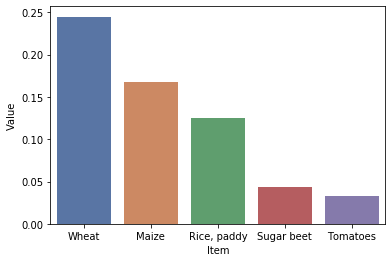

In [9]:
#Plotting egypt main production (5 higher) 
sns.barplot(x=egypt_crop.Item.head(5), y=egypt_crop.Value.head(5)/area_tot, palette="deep")

### PCA visualisation

In [10]:
#opening database and visualization
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops.head(5)

Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan        221  Almonds, with shell          5312   
1          2  Afghanistan        221  Almonds, with shell          5312   
2          2  Afghanistan        221  Almonds, with shell          5312   
3          2  Afghanistan        221  Almonds, with shell          5312   
4          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit   Value Flag  
0  Area harvested       1975  1975   ha     0.0    F  
1  Area harvested       1976  1976   ha  5900.0    F  
2  Area harvested       1977  1977   ha  6000.0    F  
3  Area harvested       1978  1978   ha  6000.0    F  
4  Area harvested       1979  1979   ha  6000.0    F

In [11]:
# we want to do a PCA between country on crops production so we need to reorganise our dataset
yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` <1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
yield_for_pca.head()

Item            Area  Agave fibres nes  Almonds, with shell  \
0        Afghanistan               0.0              16859.0   
1             Africa               0.0               5984.0   
2            Albania               0.0                  0.0   
3            Algeria               0.0              13223.0   
4     American Samoa               0.0                  0.0   

Item  Anise, badian, fennel, coriander    Apples  Apricots  Areca nuts  \
0                               6923.0   72762.0   20819.0         0.0   
1                               9201.0  152821.0   70530.0         0.0   
2                                  0.0  240028.0  159325.0         0.0   
3                                  0.0  108716.0   67149.0         0.0   
4                                  0.0       0.0       0.0         0.0   

Item  Artichokes  Asparagus  Avocados  ...  Tung nuts  Vanilla  \
0            0.0        0.0       0.0  ...        0.0      0.0   
1       157061.0    79196.0   78506.0  ...     8435.0    472.0   
2            0.0        0.0       0.0  ...        0.0      0.0   
3       188489.0        0.0       0.0  ...        0.0      0.0   
4            0.0        0.0       0.0  ...        0.0      0.0   

Item  Vegetables, fresh nes  Vegetables, leguminous nes  Vetches  \
0                   90558.0                         0.0      0.0   
1                   73677.0                     98953.0  19525.0   
2                  130879.0                     49674.0   3309.0   
3                  194467.0                     84318.0   4932.0   
4                   36430.0                         0.0      0.0   

Item  Walnuts, with shell  Watermelons    Wheat     Yams  Yautia (cocoyam)  
0                 16498.0     115473.0  19803.0      0.0               0.0  
1                 29086.0     227828.0  24526.0  87519.0               0.0  
2                     0.0     448276.0  39000.0      0.0               0.0  
3                     0.0     318040.0  11833.0      0.0               0.0  
4                     0.0          0.0      0.0  35852.0               0.0  

[5 rows x 161 columns]

In [12]:
# Compute pca for our dataset, we implemented a function in a folder to be able using it in several notebook
%run PCA_processing

pca,yield_pca=PCA_processing(yield_for_pca,'Area', yield_for_pca.columns[1:])
'''PCA_processing(dataframe, target, features)'''

'PCA_processing(dataframe, target, features)'

<Figure size 432x288 with 0 Axes>

[0.21264605 0.09051399]


'PCA_viz(dataframe)'

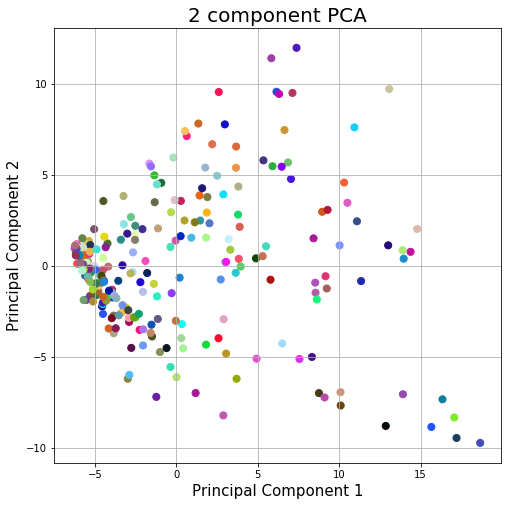

In [13]:
#Visualizing our PCA and some stat about it
%run PCA_viz

print(pca.explained_variance_ratio_)

PCA_viz(yield_pca)
'''PCA_viz(dataframe)'''

In [14]:
# In this dataframe, we want to compute the PCA on group of products
grouped_yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` >1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yield_for_pca.head()

Item            Area  Cereals (Rice Milled Eqv)  Cereals,Total  \
0        Afghanistan                    19391.0        19816.0   
1             Africa                    14245.0        15261.0   
2            Albania                    47164.0        47164.0   
3            Algeria                    10204.0        10204.0   
4     American Samoa                        0.0            0.0   

Item  Citrus Fruit,Total  Coarse Grain, Total  Fruit Primary  Pulses,Total  \
0                83127.0              16667.0        88201.0        7406.0   
1               108260.0              13007.0        88514.0        7629.0   
2               271093.0              54585.0       225650.0       13178.0   
3               181242.0               7647.0       105776.0        9978.0   
4                    0.0                  0.0        41581.0           0.0   

Item  Roots and Tubers,Total  Treenuts,Total  Vegetables Primary  
0                   119868.0         15984.0             91869.0  
1                    85875.0          5437.0             83707.0  
2                   245894.0         48487.0            272656.0  
3                   304431.0         13223.0            219122.0  
4                    38299.0             0.0             37544.0

In [15]:
#computing the PCA
%run PCA_processing

pca,grouped_yield_pca=PCA_processing(grouped_yield_for_pca,'Area', grouped_yield_for_pca.columns[1:])

<Figure size 432x288 with 0 Axes>

In [16]:
grouped_yield_pca.head()

PC1       PC2            Area
0 -1.009336  0.183452     Afghanistan
1 -1.393192  0.248178          Africa
2  2.102646 -1.141918         Albania
3 -0.350862 -1.384525         Algeria
4 -2.740002  0.675827  American Samoa

[0.43640583 0.17494791]


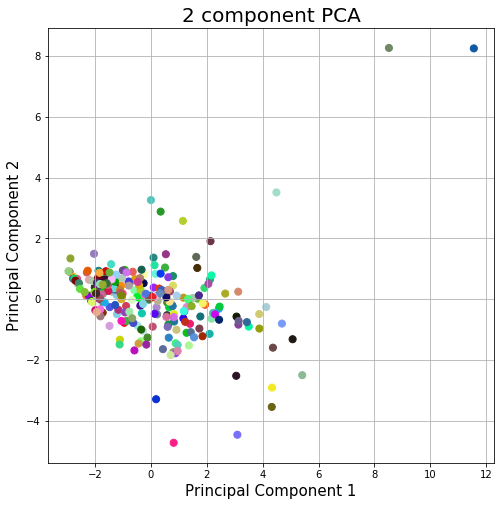

In [17]:
#Visualizing our PCA and some stat about it
%run PCA_viz
print(pca.explained_variance_ratio_)
PCA_viz(grouped_yield_pca)

In [18]:
def ferti_class(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 'low'
    elif 50<=x<150:
        return 'medium'
    else:
        return 'high'

In [19]:
#Getting use of fertilizer per country for 2016
fertilizer_area_2016=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
)
fertilizer_area_2016.head(1)

Area Code   Area  Item Code                         Item  Element Code  \
2030         59  Egypt       3102  Nutrient nitrogen N (total)          5159   

                       Element  Year Code  Year   Unit   Value Flag  
2030  Use per area of cropland       2016  2016  kg/ha  366.87   Fc

In [20]:
#Adding fertilizer use for each country in our previous dataset (grouped crops)
grouped_yield_pca_fertilizer=pd.merge(grouped_yield_pca,fertilizer_area_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
grouped_yield_pca_fertilizer['ferti_class']=grouped_yield_pca_fertilizer.Value.apply(ferti_class)

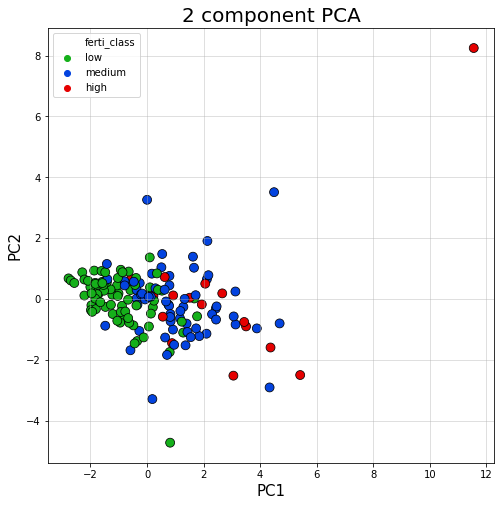

In [21]:
# Visualizing again PCA but colour are function of fertilizer use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='ferti_class', palette=sns.xkcd_palette(colors), data=grouped_yield_pca_fertilizer, s=80,edgecolor="black")

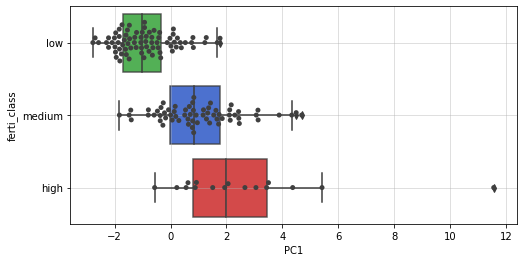

In [22]:
# Visualizing distribution per fertilizer group on component 1 axis (PC1)
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
ax = sns.boxplot(x='PC1', y='ferti_class', data=grouped_yield_pca_fertilizer, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x='PC1', y='ferti_class', data=grouped_yield_pca_fertilizer, color=".25")
ax.grid(alpha=0.5)

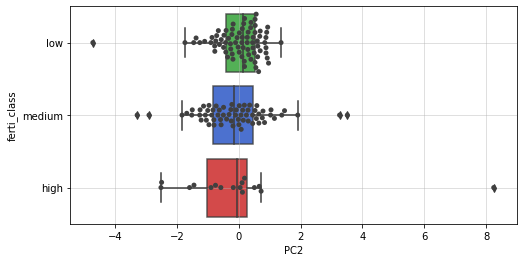

In [23]:
# Visualizing distribution per fertilizer group on component 2 axis (PC2)
fig = plt.figure(figsize = (8,4))
ax = sns.boxplot(x='PC2', y='ferti_class', data=grouped_yield_pca_fertilizer, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x='PC2', y='ferti_class', data=grouped_yield_pca_fertilizer, color=".25")
ax.grid(alpha=0.5)

ferti_class
high      AxesSubplot(0.125,0.125;0.775x0.755)
low       AxesSubplot(0.125,0.125;0.775x0.755)
medium    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PC1, dtype: object

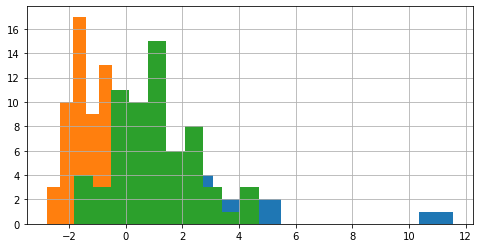

In [24]:
# Same but on an histogram
fig = plt.figure(figsize = (8,4))
grouped_yield_pca_fertilizer.groupby(grouped_yield_pca_fertilizer.ferti_class).PC1.hist()
#stats.f_oneway(grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='g'], 
            #grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='b'],grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='r'])


In [25]:
print(stats.shapiro(grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='low']),'\n',
      stats.shapiro(grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='medium']),'\n',
      stats.shapiro(grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='high']))
print('High group cannot be modelize by a normal distribution. As anova is not very robust to normal distribution assumption, we will use a Kruskal Wallis non-parametric test.')

(0.9690326452255249, 0.05703279376029968) 
 (0.9739370346069336, 0.1933034509420395) 
 (0.8056579828262329, 0.0032410931307822466)
High group cannot be modelize by a normal distribution. As anova is not very robust to normal distribution assumption, we will use a Kruskal Wallis non-parametric test.


In [26]:
import scikit_posthocs as sp #you have to "pip install scikit-posthocs" to make it work

print(stats.kruskal(grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='low'],
                    grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='medium'],
                    grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='high']))

print(sp.posthoc_dunn([grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='low'],
                    grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='medium'],
                    grouped_yield_pca_fertilizer.PC1[grouped_yield_pca_fertilizer.ferti_class=='high']]))
print('The groups are significantly different, based on rank test on PC1')

KruskalResult(statistic=71.75082039221763, pvalue=2.6272857834736627e-16)
              1             2             3
1 -1.000000e+00  4.171657e-13  4.602475e-10
2  4.171657e-13 -1.000000e+00  8.211431e-02
3  4.602475e-10  8.211431e-02 -1.000000e+00
The groups are significantly different, based on rank test on PC1


### Other PCA (for other informations):

1: Per crops (and not groups), just adding fertilizer colour

In [27]:
yield_pca_fertilizer=pd.merge(yield_pca,fertilizer_area_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
yield_pca_fertilizer['ferti_class']=yield_pca_fertilizer.Value.apply(ferti_class)

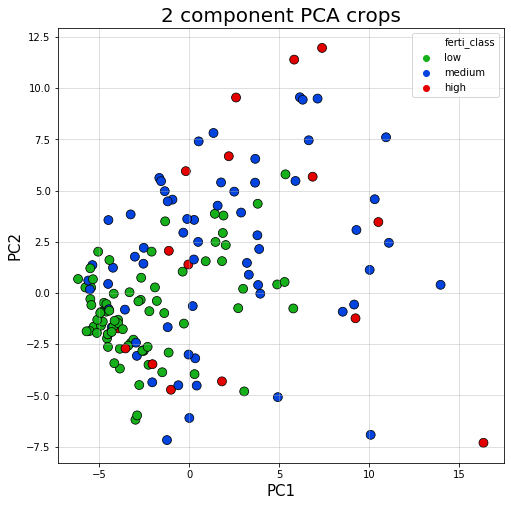

In [28]:
# Visualizing again PCA but colour are function of fertilizer use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA crops', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='ferti_class', palette=sns.xkcd_palette(colors), data=yield_pca_fertilizer, s=80,edgecolor="black")

### 2 : PCA yield/pesticides

In [29]:
pesticides=pd.read_csv('./data/Environment_Pesticides_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
pesticides.head(1)

Area Code     Area  Item Code                Item  Element Code  \
0          3  Albania       1357  Pesticides (total)          5159   

                    Element  Year Code  Year   Unit  Value Flag  
0  Use per area of cropland       1990  1990  kg/ha   0.17   Fc

In [30]:
pesticides.pivot_table(index=['Area'], aggfunc='size').head(5)

Area
Africa      27
Albania     27
Algeria     27
Americas    27
Angola      27
dtype: int64

In [31]:
pesticides.pivot_table(index=['Year'], aggfunc='size').tail(4)

Year
2013    193
2014    193
2015    193
2016    193
dtype: int64

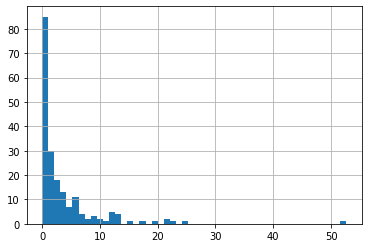

In [32]:
pesticides_2016=pesticides.query('Year == 2016')
pesticides_2016.Value.hist(bins=50)

In [33]:
def pesti_class(x): #associate a color to each bin of pesticide
    if x<2 :
        return 'low'
    elif 2<=x<10:
        return 'medium'
    else:
        return 'high'

In [34]:
#Adding pesticide use for each country in our previous dataset (grouped crops)
grouped_yield_pca_pesticides=pd.merge(grouped_yield_pca,pesticides_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
grouped_yield_pca_pesticides['pesti_class']=grouped_yield_pca_pesticides.Value.apply(pesti_class)

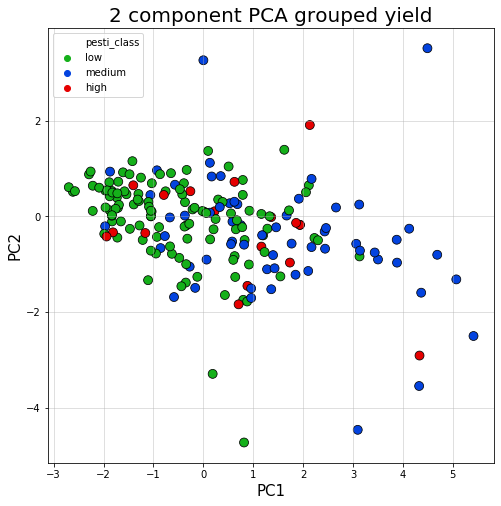

In [35]:
# Visualizing again PCA but colour are function of pesticide use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA grouped yield', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='pesti_class', palette=sns.xkcd_palette(colors), data=grouped_yield_pca_pesticides, s=80,edgecolor="black")

In [36]:
#Adding pesticide use for each country in our previous dataset (grouped crops)
yield_pca_pesticides=pd.merge(yield_pca,pesticides_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
yield_pca_pesticides['pesti_class']=yield_pca_pesticides.Value.apply(pesti_class)

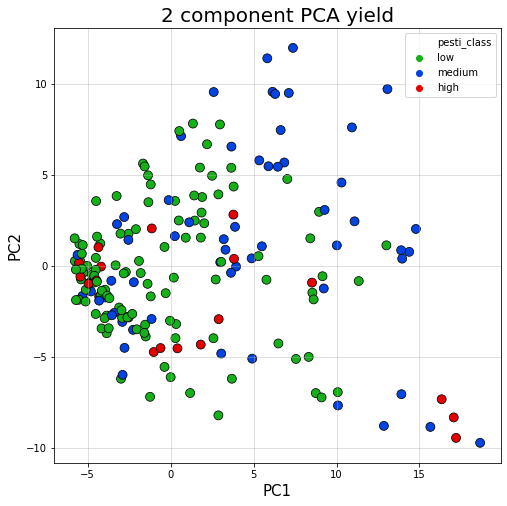

In [37]:
# Visualizing again PCA but colour are function of pesticide use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA yield', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='pesti_class', palette=sns.xkcd_palette(colors), data=yield_pca_pesticides, s=80,edgecolor="black")

## 3: Machinery

In [38]:
machinery=pd.read_csv('./data/Investment_Machinery_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
machinery.head(1)

Area Code         Area  Item Code                                Item  \
0          2  Afghanistan    2455017  Agricultural machinery nes (trade)   

   Element Code       Element  Year Code  Year      Unit  Value Flag  
0          5622  Import Value       1971  1971  1000 US$   15.0    W

In [39]:
machinery.pivot_table(index=['Item'], aggfunc='size')

Item
Agricultural machinery nes (trade)                           13551
Agricultural tractors                                         7049
Agricultural tractors, total                                 32007
Balers (straw and fodder balers including pick-up balers)     4503
Combine harvesters - threshers                                8302
Harvester and threshers (trade)                              13603
Manure spreaders and Fertiliser distributors                  4448
Milking machines                                              5601
Milking, dairy machinery (trade)                             11058
Other Agricultural tractors (two-axle tractors)               6009
Pedestrian controlled tractors (single axle tractors)         4795
Ploughs (e.g. reversible and non-reversible ploughs)          5326
Root or tuber harvesting machines                             3611
Seeders, planters and transplanters                           4979
Soil working equipment (trade)                           

In [40]:
machinery.pivot_table(index=['Year'], aggfunc='size')

Year
1961     941
1962    1027
1963    1063
1964    1119
1965    1249
1966    1671
1967    1756
1968    1762
1969    1789
1970    1839
1971    1842
1972    1852
1973    1854
1974    1867
1975    1840
1976    1896
1977    1922
1978    1938
1979    1944
1980    1964
1981    1966
1982    1953
1983    1956
1984    1962
1985    1958
1986    1959
1987    1972
1988    1966
1989    1998
1990    2080
1991    2081
1992    2320
1993    2368
1994    2431
1995    2452
1996    2434
1997    2452
1998    2424
1999    2464
2000    6791
2001    7202
2002    7393
2003    7769
2004    7875
2005    8171
2006    8072
2007    8210
2008    6518
2009    4594
dtype: int64

In [41]:
machinery.pivot_table(index=['Element','Element Code'], aggfunc='size')

Element          Element Code
Export Quantity  5907            14493
Export Value     5922            35291
Import Quantity  5607            23000
Import Value     5622            59297
In Use           5116            14845
dtype: int64

In [42]:
(machinery.query('`Element Code` == 5116')
        .query('Year==2007')
        .pivot_table(index=['Item','Item Code'], aggfunc='size')
)

Item                                                       Item Code
Agricultural tractors                                      2455011      66
Agricultural tractors, total                               2455009      33
Balers (straw and fodder balers including pick-up balers)  2455005      22
Combine harvesters - threshers                             2455004      43
Manure spreaders and Fertiliser distributors               2455003      18
Milking machines                                           2455008      24
Other Agricultural tractors (two-axle tractors)            2455013      15
Pedestrian controlled tractors (single axle tractors)      2455010      23
Ploughs (e.g. reversible and non-reversible ploughs)       2455001      35
Root or tuber harvesting machines                          2455006      14
Seeders, planters and transplanters                        2455002      28
Threshing machines                                         2455007      19
Track-laying tractors (crawlers

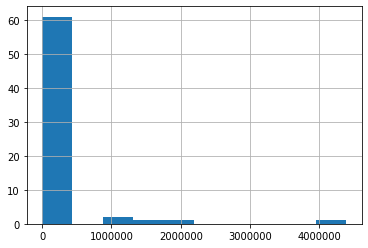

In [43]:
(machinery.query('`Element Code` == 5116')
        .query('Year==2007')
        .query('`Item Code` == 2455011')
        .Value
        .hist()
)


We can maybe see outliers with huge differences into distribution value

In [44]:
# look at huge value to see if there are some inconsistences
(machinery.query('`Element Code` == 5116')
        .query('Year==2007')
        .query('`Item Code` == 2455011')
        .query('Value > 100000')
).head()

Area Code                        Area  Item Code  \
888            4                     Algeria    2455011   
22086         41             China, mainland    2455011   
32648         59                       Egypt    2455011   
49785        102  Iran (Islamic Republic of)    2455011   
61548        126                   Lithuania    2455011   

                        Item  Element Code Element  Year Code  Year Unit  \
888    Agricultural tractors          5116  In Use       2007  2007   No   
22086  Agricultural tractors          5116  In Use       2007  2007   No   
32648  Agricultural tractors          5116  In Use       2007  2007   No   
49785  Agricultural tractors          5116  In Use       2007  2007   No   
61548  Agricultural tractors          5116  In Use       2007  2007   No   

           Value Flag  
888     103558.0    I  
22086  2047900.0    Q  
32648   102584.0    Q  
49785   308422.0    Q  
61548   114900.0    Q

The unit "no" is quite surprising. In the FAO website we can just read that its a number, no information about the unit.
Thus, are units congruents ?

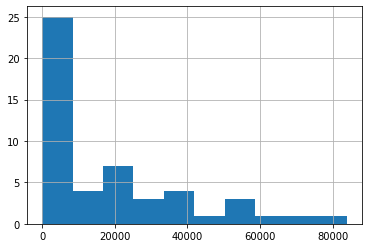

In [45]:
# select only small values
machinery_small=(machinery.query('`Element Code` == 5116')
        .query('Year==2007')
        .query('`Item Code` == 2455011')
        .query('Value < 100000')
)
machinery_small.Value.hist()

Seems to be more easily analyzable so we will test this parameter

In [46]:
def machi_class(x): #associate a color to each bin of pesticide
    if x<10000 :
        return 'low'
    elif 10000<=x<40000:
        return 'medium'
    else:
        return 'high'

In [47]:
#inner joint by default so we don't need to drop high value
yield_pca_machinery=pd.merge(yield_pca,machinery_small.loc[:,['Area','Value']],left_on='Area',right_on='Area')
yield_pca_machinery['machi_class']=yield_pca_machinery.Value.apply(machi_class)

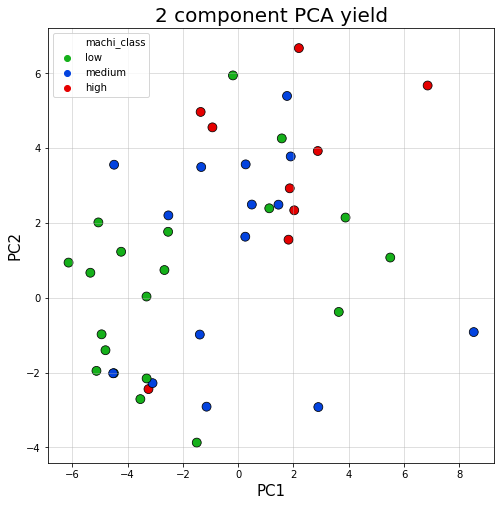

In [48]:
# Visualizing again PCA but colour are function of pesticide use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA yield', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='machi_class', palette=sns.xkcd_palette(colors), data=yield_pca_machinery, s=80,edgecolor="black")

In [49]:
grouped_yield_pca_machinery=pd.merge(grouped_yield_pca,machinery_small.loc[:,['Area','Value']],left_on='Area',right_on='Area')
grouped_yield_pca_machinery['machi_class']=grouped_yield_pca_machinery.Value.apply(machi_class)

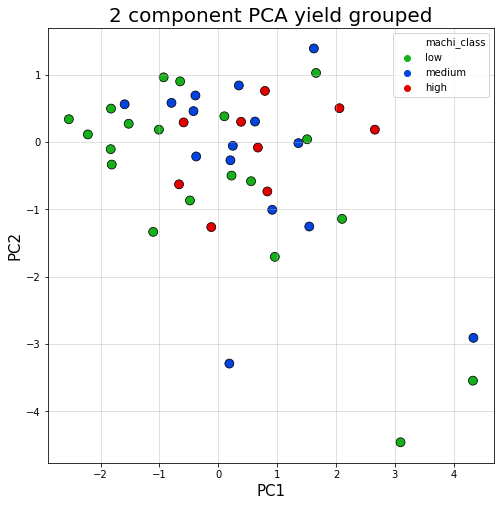

In [50]:
# Visualizing again PCA but colour are function of pesticide use
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA yield grouped', fontsize = 20)


colors = ["green", "blue", "red"]
ax.grid(alpha=0.5)
ax = sns.scatterplot(x='PC1', y='PC2', hue='machi_class', palette=sns.xkcd_palette(colors), data=grouped_yield_pca_machinery, s=80,edgecolor="black")